In [83]:
import pandas as pd
import numpy as np # for data analysis

import seaborn as sns
import matplotlib.pyplot as plt # Data visualization

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score # Mchine learning and evaluation

import warnings
warnings.filterwarnings("ignore")

In [83]:
import pandas as pd
import numpy as np # for data analysis

import seaborn as sns
import matplotlib.pyplot as plt # Data visualization

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score # Mchine learning and evaluation

import warnings
warnings.filterwarnings("ignore")

In [84]:
data = pd.read_csv (r"C:\Users\Lenovo\OneDrive\Desktop\Downloads\Country-data - Country-data.csv")

In [85]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [87]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

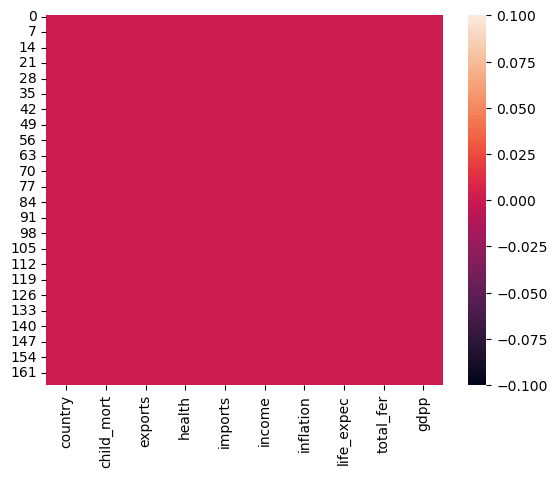

In [88]:
sns.heatmap(data.isnull())

# EXPLANATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [91]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [92]:
num_data = data.select_dtypes(include=[float, int])

In [93]:
num_data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


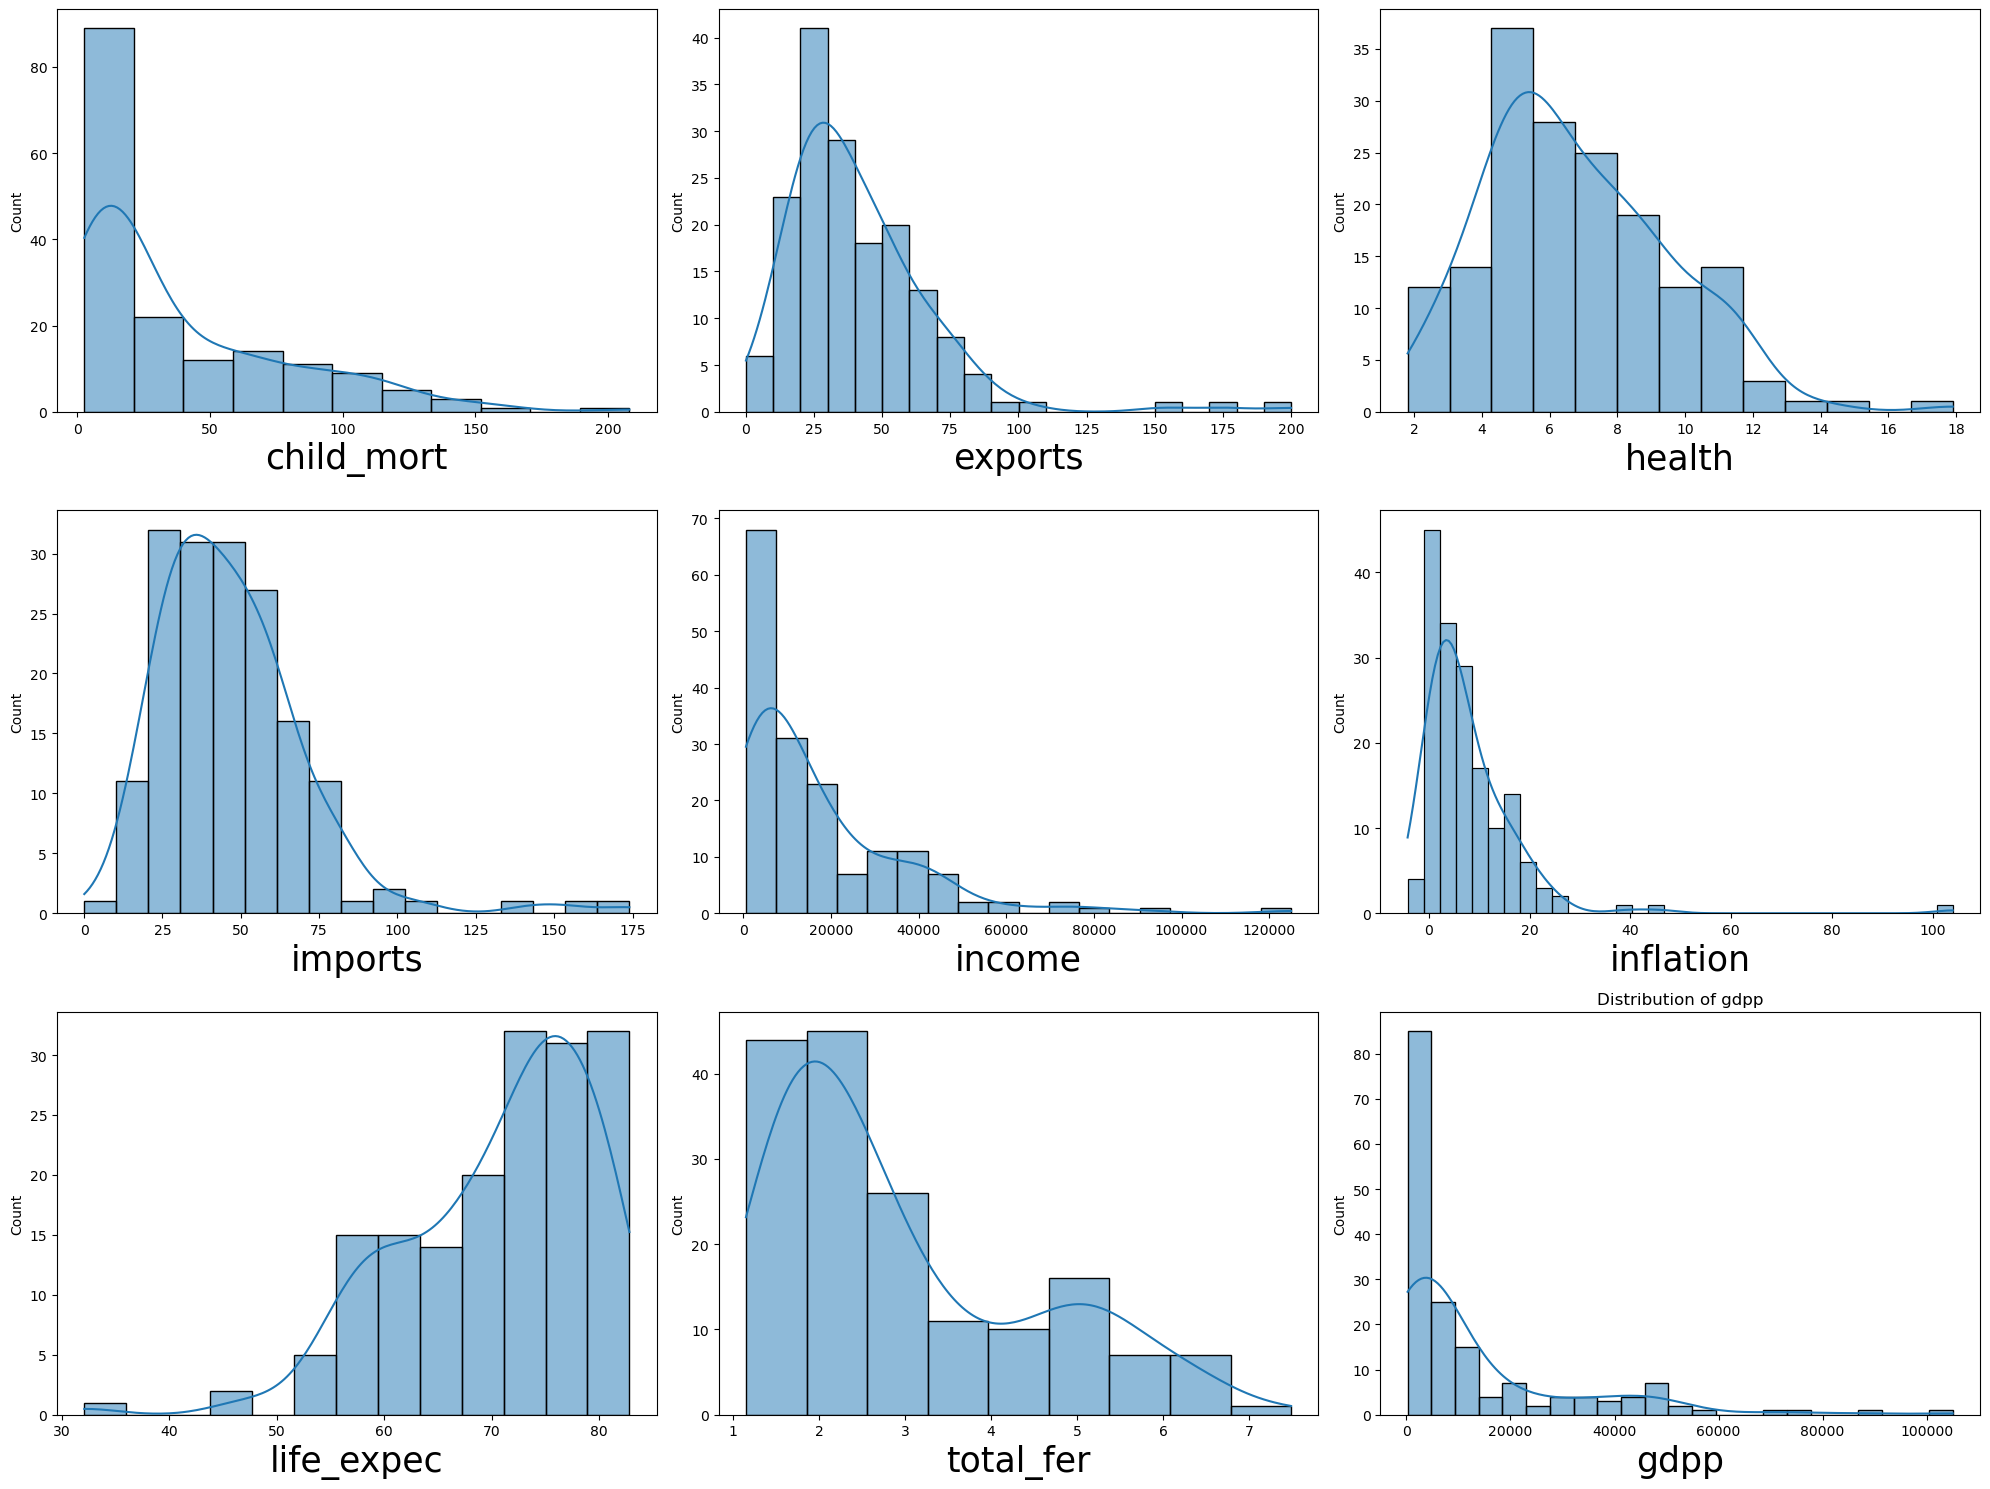

In [94]:
fig, axes = plt.subplots(ncols= 3, nrows = 3, figsize = (20,15))

position  = axes.flatten()

for index, column_name in enumerate(num_data.columns):
    plot = sns.histplot(data = data[column_name], kde=True, ax = position[index])
    plt.title(f'Distribution of {column_name}')
    plot.set_xlabel(column_name, size=25)
    
plt.tight_layout()

### Insights:
#### - child_mort: Right-skewed, most countries have low child mortality (below 50), but some exceed 100, indicating disparities in health outcomes.
#### - exports/imports: Both right-skewed, most countries have moderate export/import percentages (below 75%), but some exceed 100%, showing reliance on trade.
#### - health: Right-skewed, most countries spend 4-8% of GDP on health, with some spending up to 16%, indicating differences in healthcare investment.
#### - income: Heavily right-skewed, with most countries earning below $40,000, but a few wealthy countries show large disparities.
#### - inflation: Right-skewed, with most inflation rates below 20%, but some countries face hyperinflation (up to 100%).
#### - life_expec: Left-skewed, most countries have high life expectancy (60-80 years), with a few facing severe health challenges.
#### - total_fer: Right-skewed, with most fertility rates between 2-4 children, but some over 5.
#### - gdpp: Highly skewed, most countries have low GDP per capita, while a few are extremely wealthy.

## Bivariate Analysis

#### Life Expectancy Vs Income
#### Objective: Explore how national income affects life expectancy.

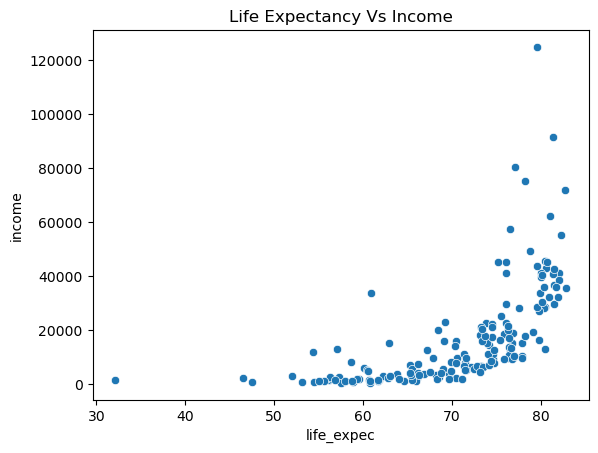

In [98]:
sns.scatterplot(x='life_expec', y='income', data=data)
plt.title("Life Expectancy Vs Income")
plt.show()

#### GDP per Capita (gdpp) vs. Child Mortality:

#### Objective: Investigate if countries with higher GDP per capita experience lower child

### Child Mortality Vs Income

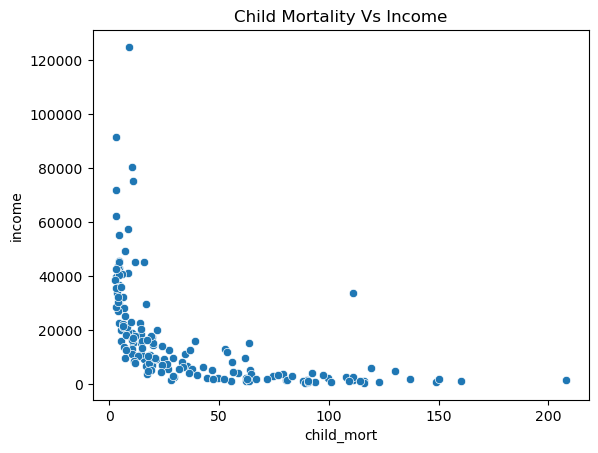

In [101]:
# sns.regplot(x='child_mort', y='income', data=data)
sns.scatterplot(x='child_mort', y='income', data=data)
plt.title("Child Mortality Vs Income")
plt.show()

### Health Spending (health) vs. Life Expectancy:
#### Objective: Analyze whether higher health expenditure is associated with better health

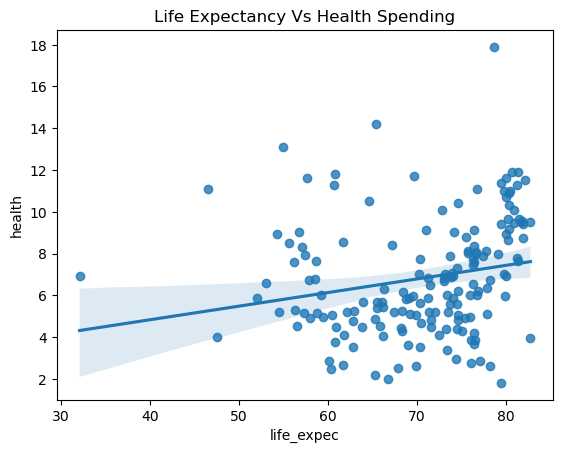

In [103]:
# sns.scatterplot(x='life_expec', y='health', data=data)
sns.regplot(x='life_expec', y='health', data=data)
plt.title("Life Expectancy Vs Health Spending")
plt.show()

### Exports vs. Imports:
#### Objective: Examine the balance between exports and imports in each country.

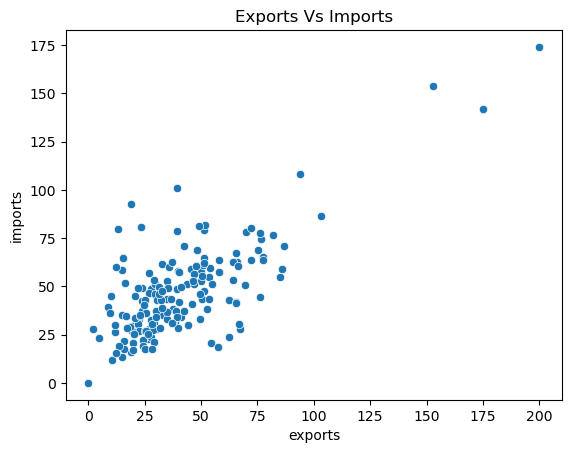

In [105]:
sns.scatterplot(x='exports', y='imports', data=data)
plt.title("Exports Vs Imports")
plt.show()

### Inflation vs. GDP per Capita (gdpp):
#### Objective: Explore whether high inflation is negatively associated with GDP per capita.

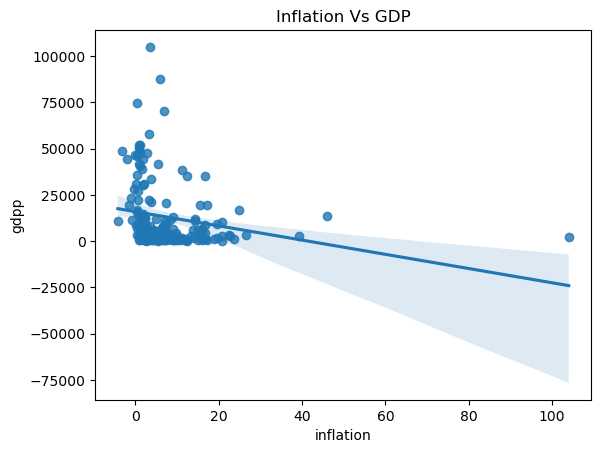

In [107]:
sns.regplot(x='inflation', y='gdpp', data=data)
plt.title("Inflation Vs GDP")
plt.show()

### Fertility Rate (total_fer) vs. Child Mortality:
#### Objective: Investigate if higher fertility rates are linked to higher child mortality.

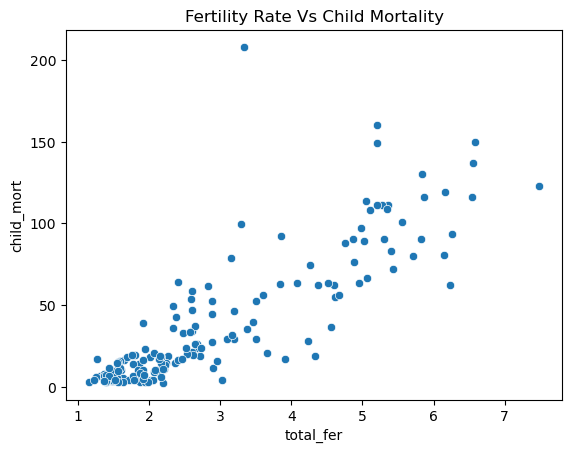

In [109]:
sns.scatterplot(x='total_fer', y='child_mort', data=data)
plt.title("Fertility Rate Vs Child Mortality")
plt.show()

### Health Spending vs. Income:
#### Objective: Determine if wealthier countries invest more in healthcare.

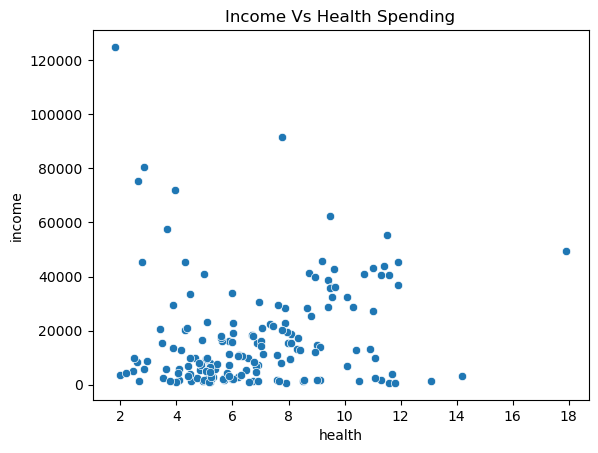

In [111]:
sns.scatterplot(x='health', y='income', data=data)
plt.title("Income Vs Health Spending")
plt.show()

### Within Health metrics Analysis

### Child Mortality vs. Life Expectancy:
#### Objective: Investigate if countries with higher child mortality rates have lower life expectancy.

### Health Spending vs. Life Expectancy:
#### Objective: Analyze whether countries that spend more on healthcare have a longer life expectancy.

### Health Spending vs. Child Mortality:
#### Objective: Examine if increased health spending reduces child mortality rates.

### Total Fertility Rate vs. Life Expectancy:
#### Objective: Investigate whether countries with higher fertility rates tend to have lower life expectancy.

### Countries with the heighest mortality rate

In [114]:
data.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


In [115]:
top_five_child_mort = data.sort_values(by='child_mort', ascending=False)[:5]

In [116]:
least_five_child_mort = data.sort_values(by='child_mort')[:5]

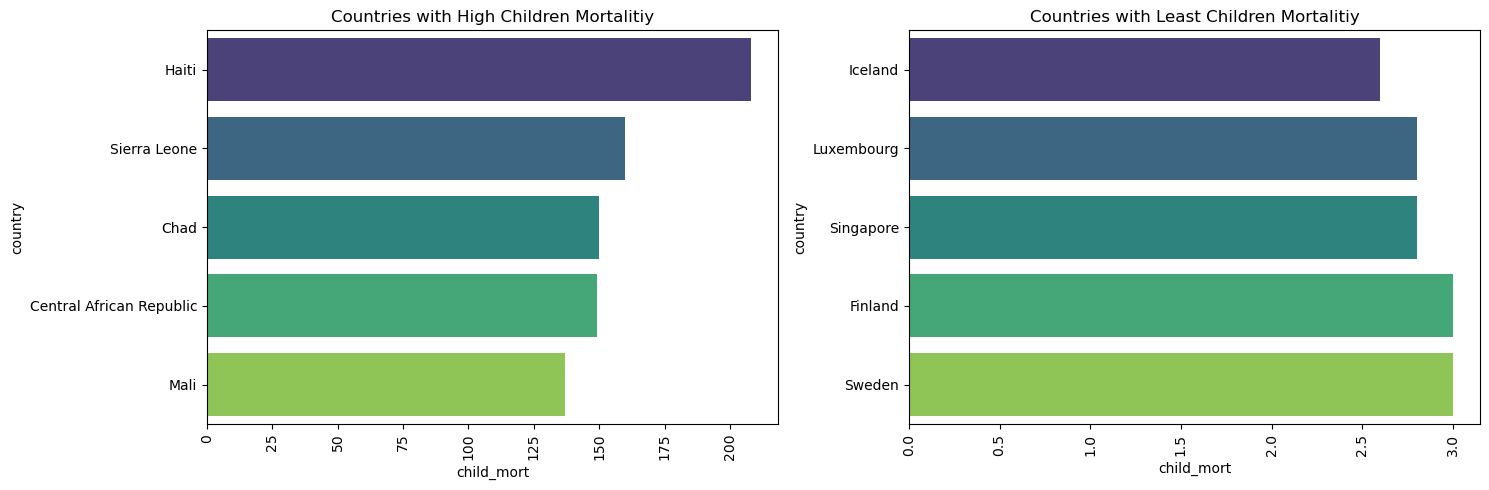

In [117]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x ='child_mort', y ='country', data=top_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with High Children Mortalitiy')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x ='child_mort', y ='country', data=least_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with Least Children Mortalitiy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS

In [119]:
numerical_data_corr = data.select_dtypes(exclude='object').corr()

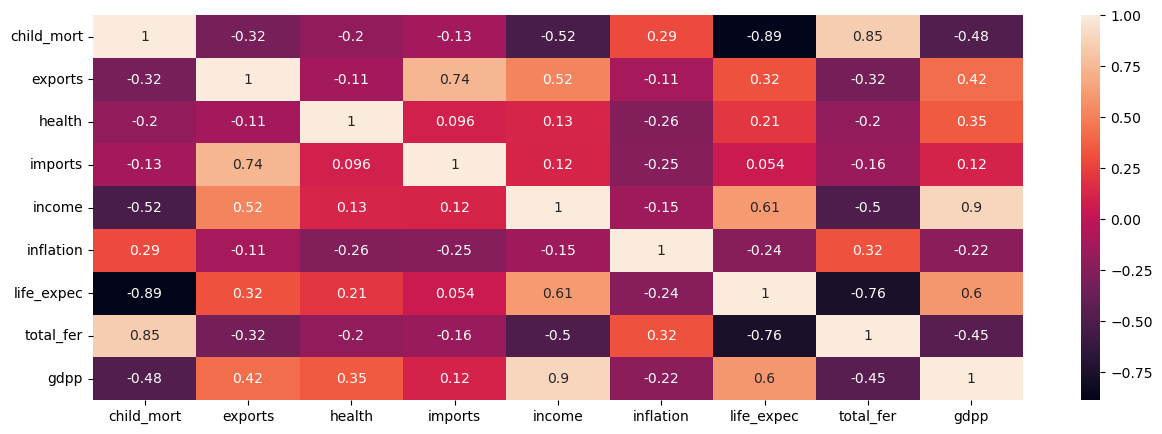

In [120]:
plt.figure(figsize=(15, 5))
sns.heatmap(numerical_data_corr, annot=True)
plt.show()

# Feature Engineering

### Some features belong to similar categories and behave similarly with features from other categories:
### Lets create new features that fall into the three categories:
1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

### Health Metrics
- Child Mortality (child_mort): Higher values indicate poorer health outcomes, so we want to invert this relationship.
- Life Expectancy (life_expec): Higher values are positive indicators of health.
- Health Spending (health): Higher values indicate better health investment, so this should be a positive contributor.
- Total Fertility Rate (total_fer): This can indicate population growth, but higher rates might also suggest challenges in health outcomes.

### Finance Metrics
- Income (income): Higher values indicate better economic health.
- GDP per capita (gdpp): Also a positive economic indicator.
- Inflation (inflation): Higher inflation is generally negative for financial health.


In [171]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [173]:
new_data = pd.DataFrame()
new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) + 
                      (data['health'] / data['health'].mean()) - 
                      (data['child_mort'] / data['child_mort'].mean()) - 
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())  

In [175]:
new_data

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688
2,0.002385,1.603752,-0.972476
3,-3.929096,2.430387,-2.262080
4,0.981553,2.362940,1.870058
...,...,...,...
162,-0.287065,2.257474,0.064477
163,0.504365,1.068624,-3.894624
164,0.769324,3.461820,-1.191967
165,-1.338566,1.463396,-2.670352


In [177]:
new_data.head(2)

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688


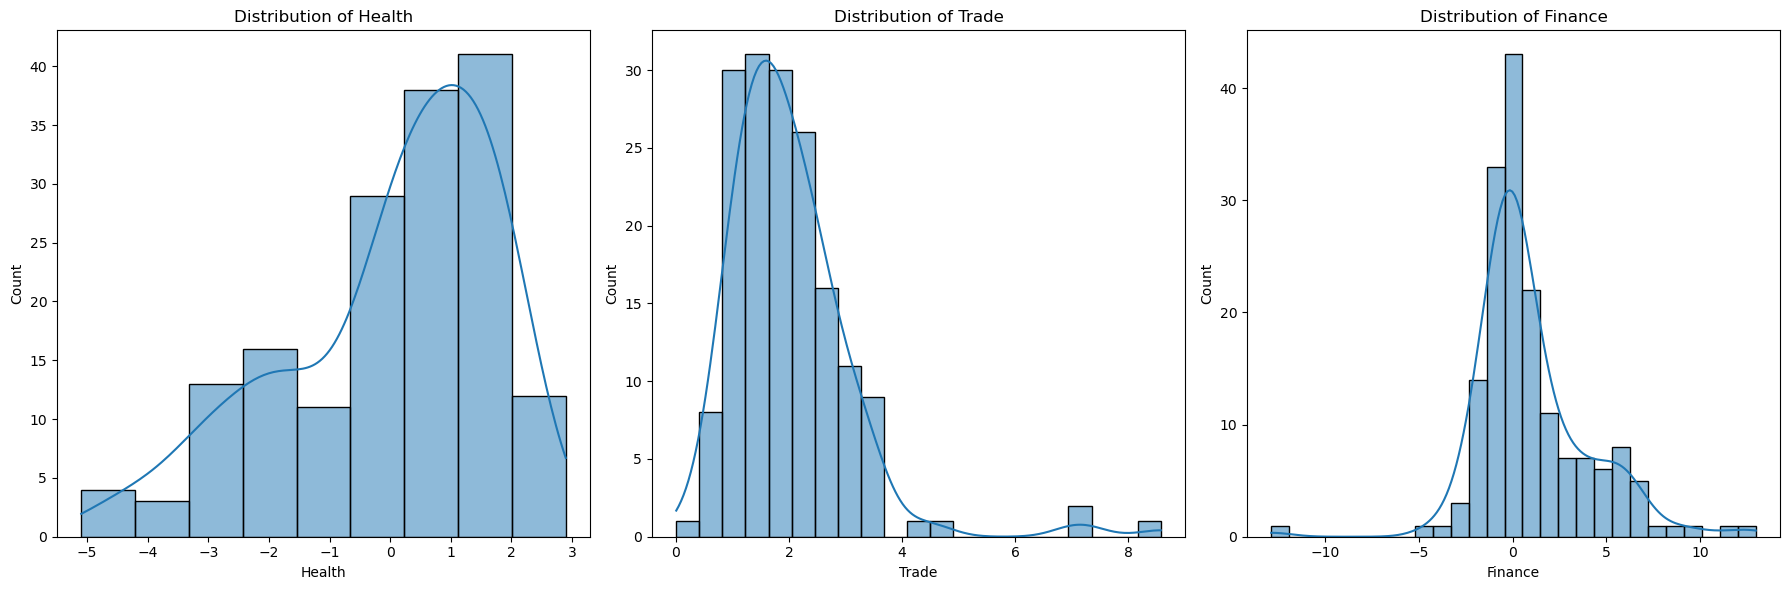

In [187]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axes= axes.flatten()
for index, column_name in enumerate(new_data):
    sns.histplot(new_data[column_name], kde=True, ax=axes[index])
    axes[index].set_title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

In [189]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler() 

new_data['Health'] = scaler.fit_transform(new_data[['Health']])
new_data['Trade'] = scaler.fit_transform(new_data[['Trade']])
new_data['Finance'] = scaler.fit_transform(new_data[['Finance']])

In [195]:
new_data

,Health,Trade,Finance
0,-1.384975,-0.726043,-0.684496
1,0.599706,-0.256572,-0.224915
2,0.001363,-0.359982,-0.650200
3,-2.246312,0.390996,-1.075300
4,0.561166,0.329722,0.286803
...,...,...,...
162,-0.164119,0.233909,-0.308383
163,0.288352,-0.846133,-1.613446
164,0.439832,1.328029,-0.722552
165,-0.765274,-0.487492,-1.209881


# MODELLING (K-Means)

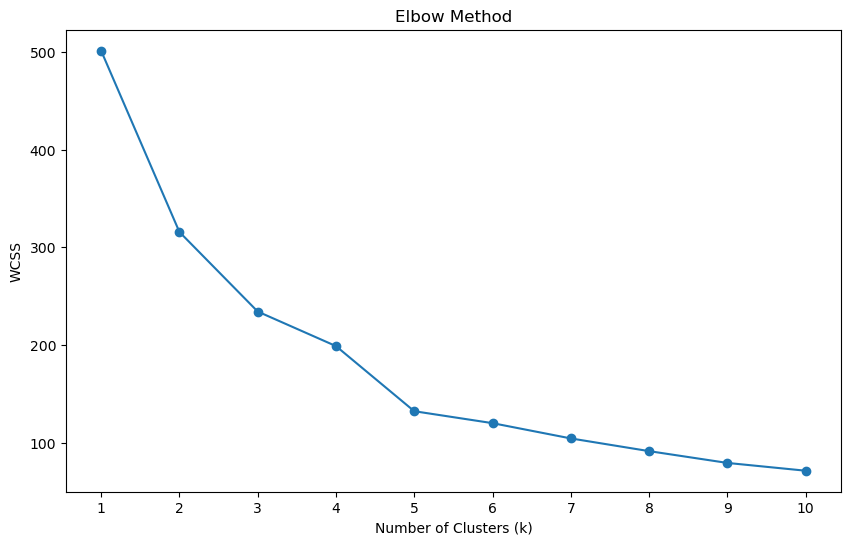

In [213]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [219]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(new_data)

data['cluster']= kmeans.labels_

In [221]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [225]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [227]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [229]:
data['Class'] = kmeans.labels_

In [231]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0


## MODEL INTERPRETATION

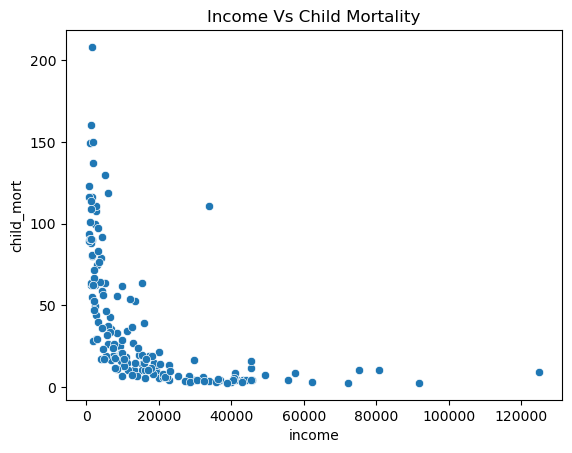

In [234]:
# Income Vs Child Mortality
# sns.regplot(x='child_mort', y='income', data=data)
sns.scatterplot(x='income', y='child_mort', data=data)
plt.title("Income Vs Child Mortality")
plt.show()

### Since we know low income and high child mortality are related
#### We plot `Income` and `Child mortality` w.r.t `class` predictions

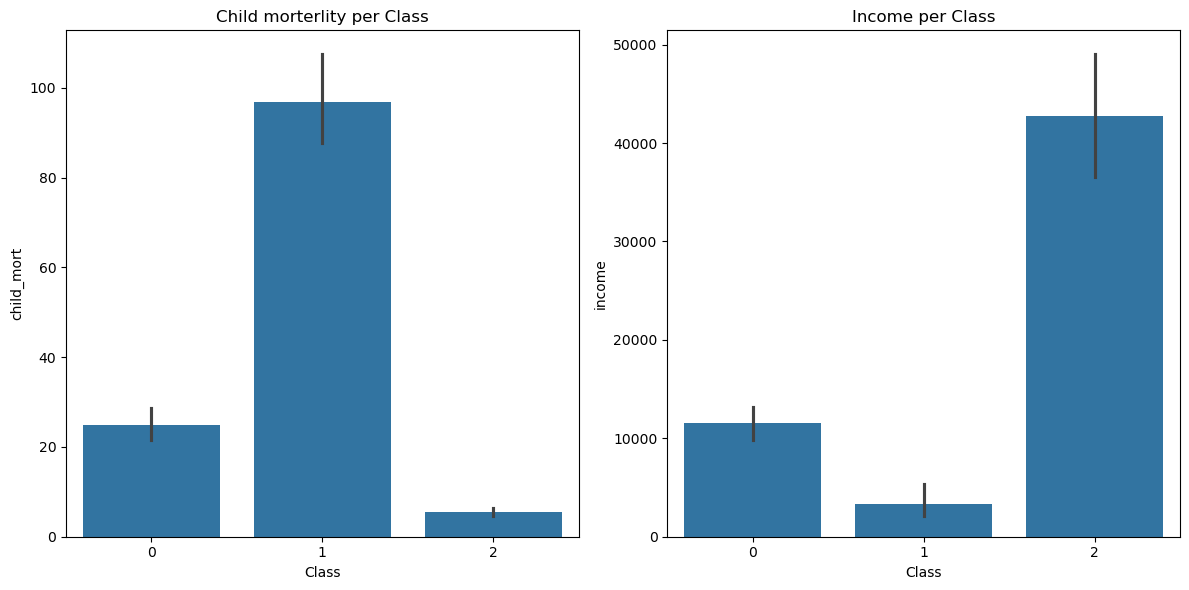

In [237]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='Class', y='child_mort', data=data) 
plt.title('Child morterlity per Class')

plt.subplot(1,2,2)
sns.barplot(x='Class', y='income', data=data)
plt.title('Income per Class')

plt.tight_layout()
plt.show()

### It is clear to conlude that:

0 : Not a priority <br>
1 : Requires foreign aid <br>
2 : Do NOT requires foreign aid <br>

In [240]:
# RENAMING THE CLASSES

data['Class'] = data['Class'].replace({0: "Not a priority", 
                                     1: "Requires foreign aid",
                                     2: "Do NOT requires foreign aid"
                                    })

In [242]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Requires foreign aid
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Not a priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Not a priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Requires foreign aid
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Not a priority


### Lets plot an interactive GeoMAP showing these categories

In [253]:
data[['country', 'Class']]

,country,Class
0,Afghanistan,Requires foreign aid
1,Albania,Not a priority
2,Algeria,Not a priority
3,Angola,Requires foreign aid
4,Antigua and Barbuda,Not a priority
...,...,...
162,Vanuatu,Not a priority
163,Venezuela,Not a priority
164,Vietnam,Not a priority
165,Yemen,Requires foreign aid


In [245]:
import plotly.express as px

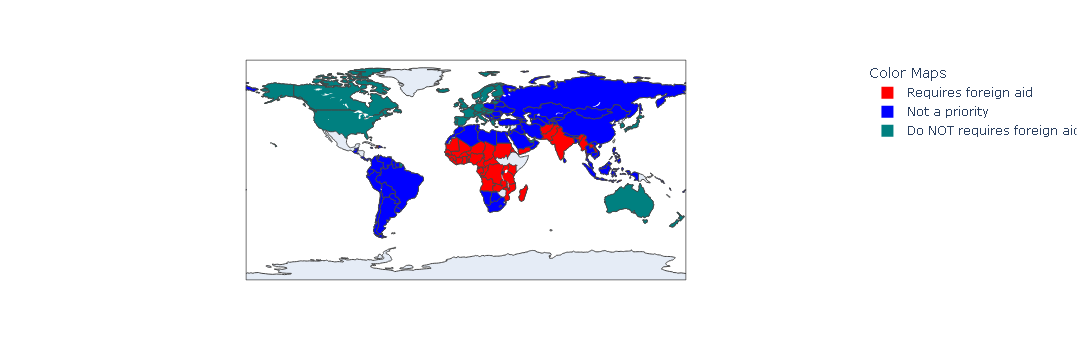

In [251]:
fig = px.choropleth(data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = data['Class'],  
                    color_discrete_map = {'Requires foreign aid':'Red',
                                        'Do NOT requires foreign aid':'teal',
                                        'Not a priority':'blue'}
                   )
fig.update_layout(legend_title_text = 'Color Maps')
fig.show()

In [84]:
data = pd.read_csv (r"C:\Users\Lenovo\OneDrive\Desktop\Downloads\Country-data - Country-data.csv")

In [85]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [87]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

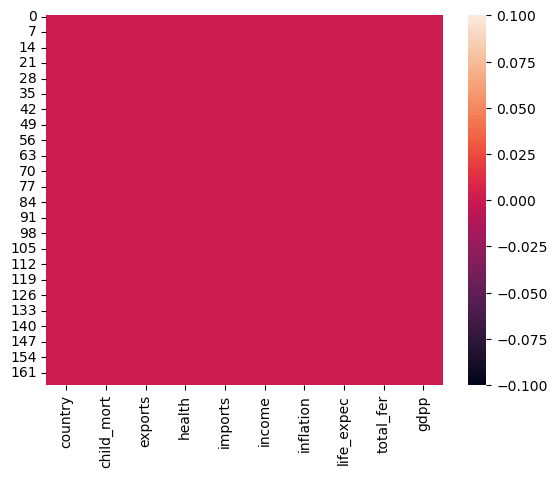

In [88]:
sns.heatmap(data.isnull())

# EXPLANATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [91]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [92]:
num_data = data.select_dtypes(include=[float, int])

In [93]:
num_data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


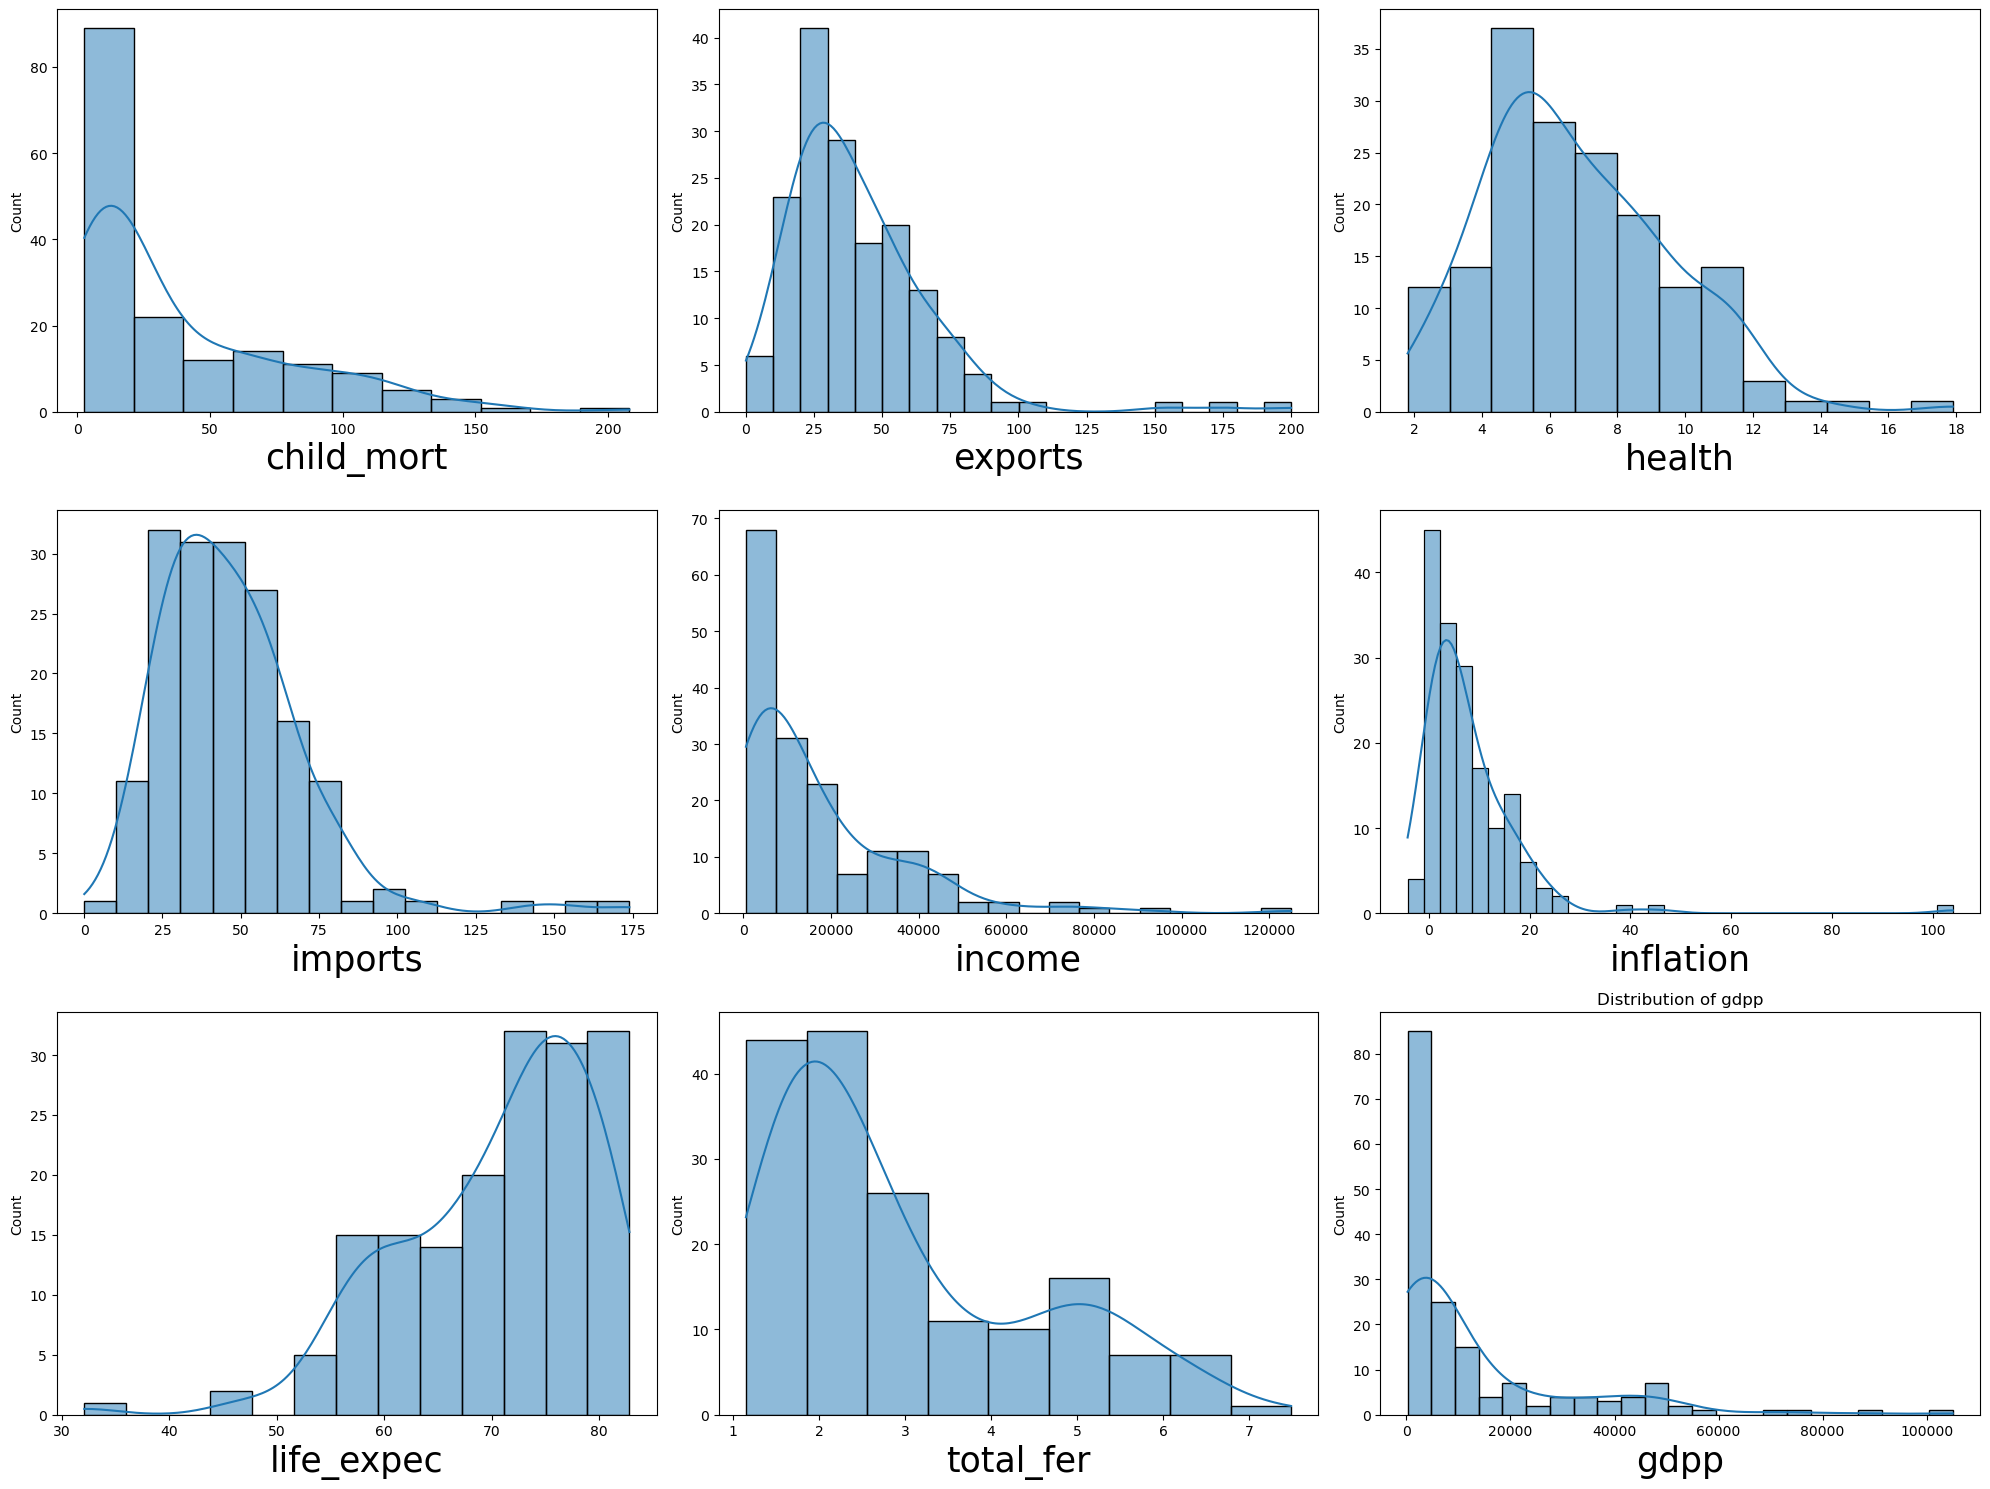

In [94]:
fig, axes = plt.subplots(ncols= 3, nrows = 3, figsize = (20,15))

position  = axes.flatten()

for index, column_name in enumerate(num_data.columns):
    plot = sns.histplot(data = data[column_name], kde=True, ax = position[index])
    plt.title(f'Distribution of {column_name}')
    plot.set_xlabel(column_name, size=25)
    
plt.tight_layout()

### Insights:
#### - child_mort: Right-skewed, most countries have low child mortality (below 50), but some exceed 100, indicating disparities in health outcomes.
#### - exports/imports: Both right-skewed, most countries have moderate export/import percentages (below 75%), but some exceed 100%, showing reliance on trade.
#### - health: Right-skewed, most countries spend 4-8% of GDP on health, with some spending up to 16%, indicating differences in healthcare investment.
#### - income: Heavily right-skewed, with most countries earning below $40,000, but a few wealthy countries show large disparities.
#### - inflation: Right-skewed, with most inflation rates below 20%, but some countries face hyperinflation (up to 100%).
#### - life_expec: Left-skewed, most countries have high life expectancy (60-80 years), with a few facing severe health challenges.
#### - total_fer: Right-skewed, with most fertility rates between 2-4 children, but some over 5.
#### - gdpp: Highly skewed, most countries have low GDP per capita, while a few are extremely wealthy.

## Bivariate Analysis

#### Life Expectancy Vs Income
#### Objective: Explore how national income affects life expectancy.

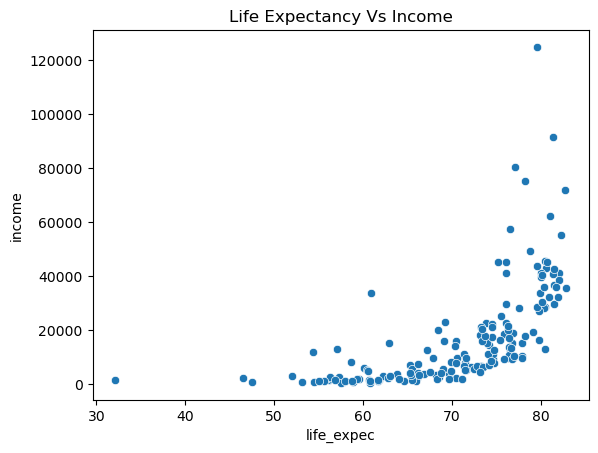

In [98]:
sns.scatterplot(x='life_expec', y='income', data=data)
plt.title("Life Expectancy Vs Income")
plt.show()

#### GDP per Capita (gdpp) vs. Child Mortality:

#### Objective: Investigate if countries with higher GDP per capita experience lower child

### Child Mortality Vs Income

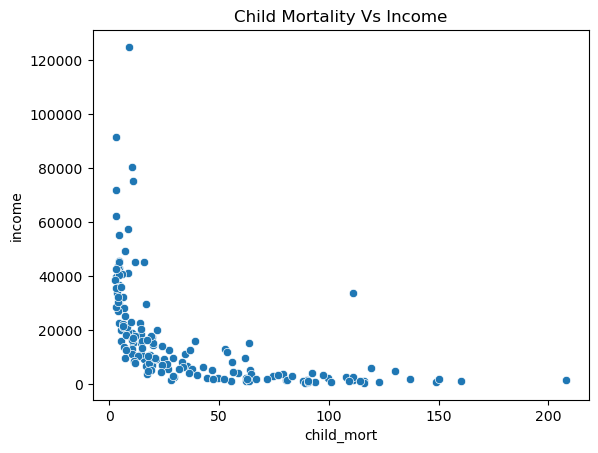

In [101]:
# sns.regplot(x='child_mort', y='income', data=data)
sns.scatterplot(x='child_mort', y='income', data=data)
plt.title("Child Mortality Vs Income")
plt.show()

### Health Spending (health) vs. Life Expectancy:
#### Objective: Analyze whether higher health expenditure is associated with better health

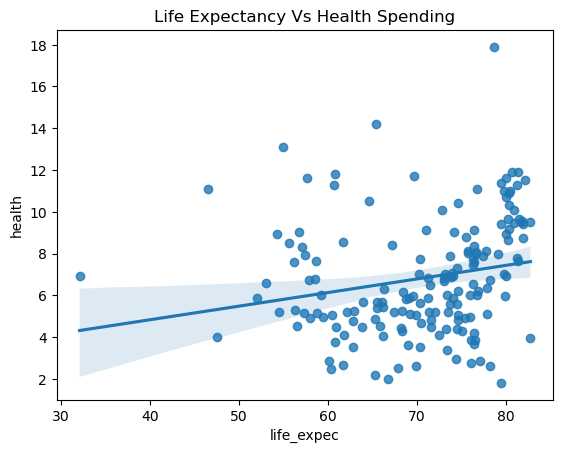

In [103]:
# sns.scatterplot(x='life_expec', y='health', data=data)
sns.regplot(x='life_expec', y='health', data=data)
plt.title("Life Expectancy Vs Health Spending")
plt.show()

### Exports vs. Imports:
#### Objective: Examine the balance between exports and imports in each country.

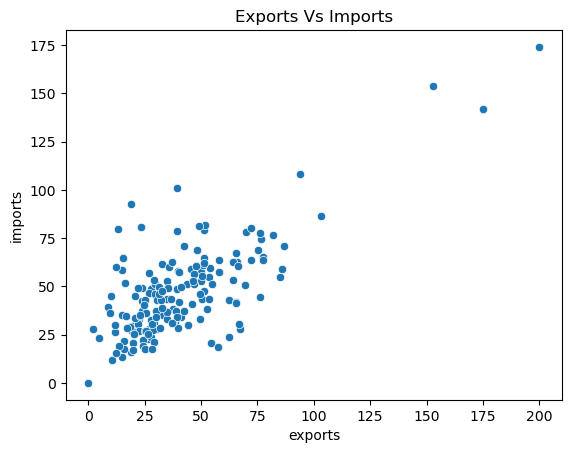

In [105]:
sns.scatterplot(x='exports', y='imports', data=data)
plt.title("Exports Vs Imports")
plt.show()

### Inflation vs. GDP per Capita (gdpp):
#### Objective: Explore whether high inflation is negatively associated with GDP per capita.

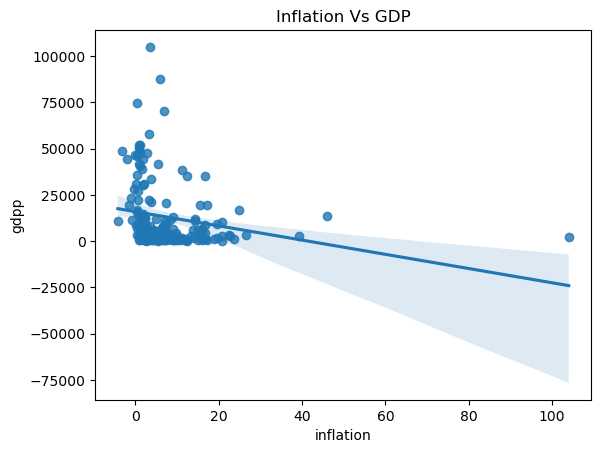

In [107]:
sns.regplot(x='inflation', y='gdpp', data=data)
plt.title("Inflation Vs GDP")
plt.show()

### Fertility Rate (total_fer) vs. Child Mortality:
#### Objective: Investigate if higher fertility rates are linked to higher child mortality.

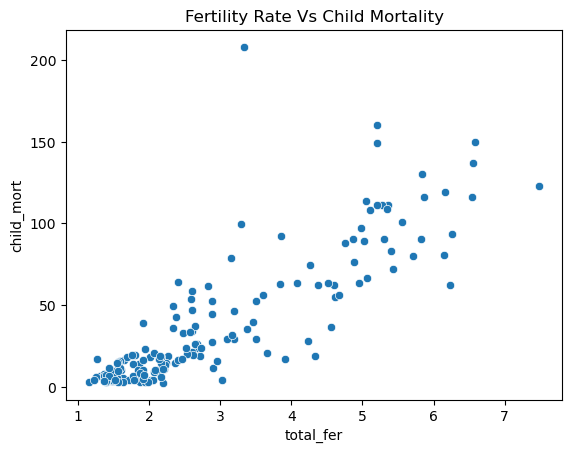

In [109]:
sns.scatterplot(x='total_fer', y='child_mort', data=data)
plt.title("Fertility Rate Vs Child Mortality")
plt.show()

### Health Spending vs. Income:
#### Objective: Determine if wealthier countries invest more in healthcare.

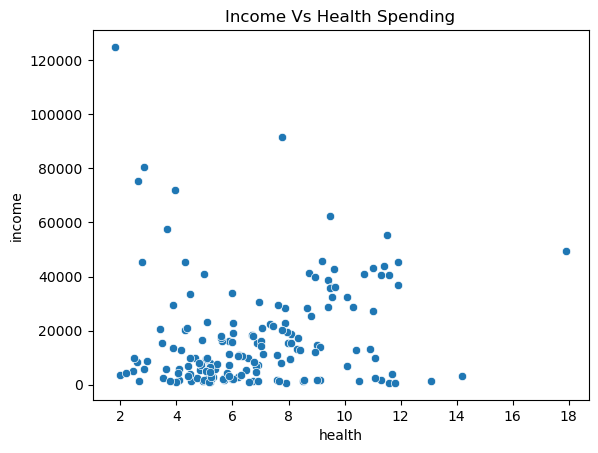

In [111]:
sns.scatterplot(x='health', y='income', data=data)
plt.title("Income Vs Health Spending")
plt.show()

### Within Health metrics Analysis

### Child Mortality vs. Life Expectancy:
#### Objective: Investigate if countries with higher child mortality rates have lower life expectancy.

### Health Spending vs. Life Expectancy:
#### Objective: Analyze whether countries that spend more on healthcare have a longer life expectancy.

### Health Spending vs. Child Mortality:
#### Objective: Examine if increased health spending reduces child mortality rates.

### Total Fertility Rate vs. Life Expectancy:
#### Objective: Investigate whether countries with higher fertility rates tend to have lower life expectancy.

### Countries with the heighest mortality rate

In [114]:
data.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


In [115]:
top_five_child_mort = data.sort_values(by='child_mort', ascending=False)[:5]

In [116]:
least_five_child_mort = data.sort_values(by='child_mort')[:5]

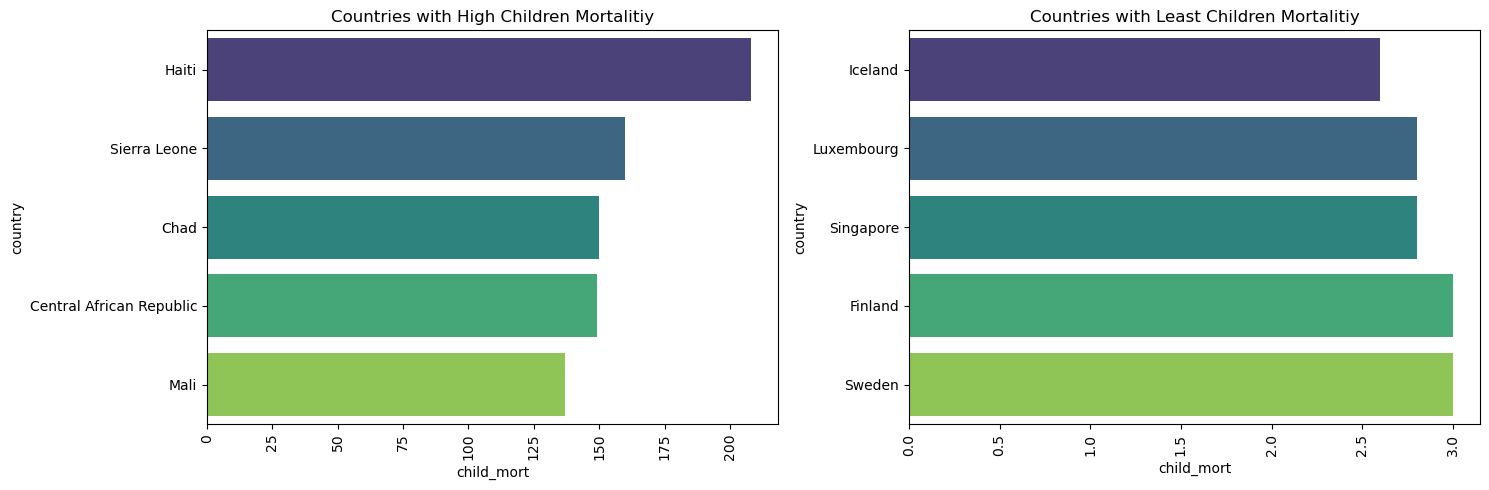

In [117]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x ='child_mort', y ='country', data=top_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with High Children Mortalitiy')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x ='child_mort', y ='country', data=least_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with Least Children Mortalitiy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS

In [119]:
numerical_data_corr = data.select_dtypes(exclude='object').corr()

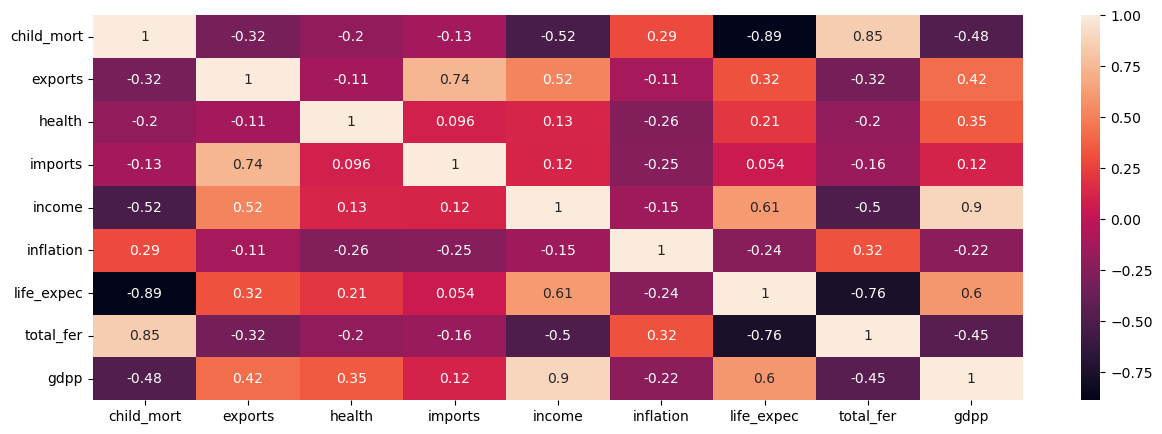

In [120]:
plt.figure(figsize=(15, 5))
sns.heatmap(numerical_data_corr, annot=True)
plt.show()

# Feature Engineering

### Some features belong to similar categories and behave similarly with features from other categories:
### Lets create new features that fall into the three categories:
1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

### Health Metrics
- Child Mortality (child_mort): Higher values indicate poorer health outcomes, so we want to invert this relationship.
- Life Expectancy (life_expec): Higher values are positive indicators of health.
- Health Spending (health): Higher values indicate better health investment, so this should be a positive contributor.
- Total Fertility Rate (total_fer): This can indicate population growth, but higher rates might also suggest challenges in health outcomes.

### Finance Metrics
- Income (income): Higher values indicate better economic health.
- GDP per capita (gdpp): Also a positive economic indicator.
- Inflation (inflation): Higher inflation is generally negative for financial health.


In [171]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [173]:
new_data = pd.DataFrame()
new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) + 
                      (data['health'] / data['health'].mean()) - 
                      (data['child_mort'] / data['child_mort'].mean()) - 
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())  

In [175]:
new_data

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688
2,0.002385,1.603752,-0.972476
3,-3.929096,2.430387,-2.262080
4,0.981553,2.362940,1.870058
...,...,...,...
162,-0.287065,2.257474,0.064477
163,0.504365,1.068624,-3.894624
164,0.769324,3.461820,-1.191967
165,-1.338566,1.463396,-2.670352


In [177]:
new_data.head(2)

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688


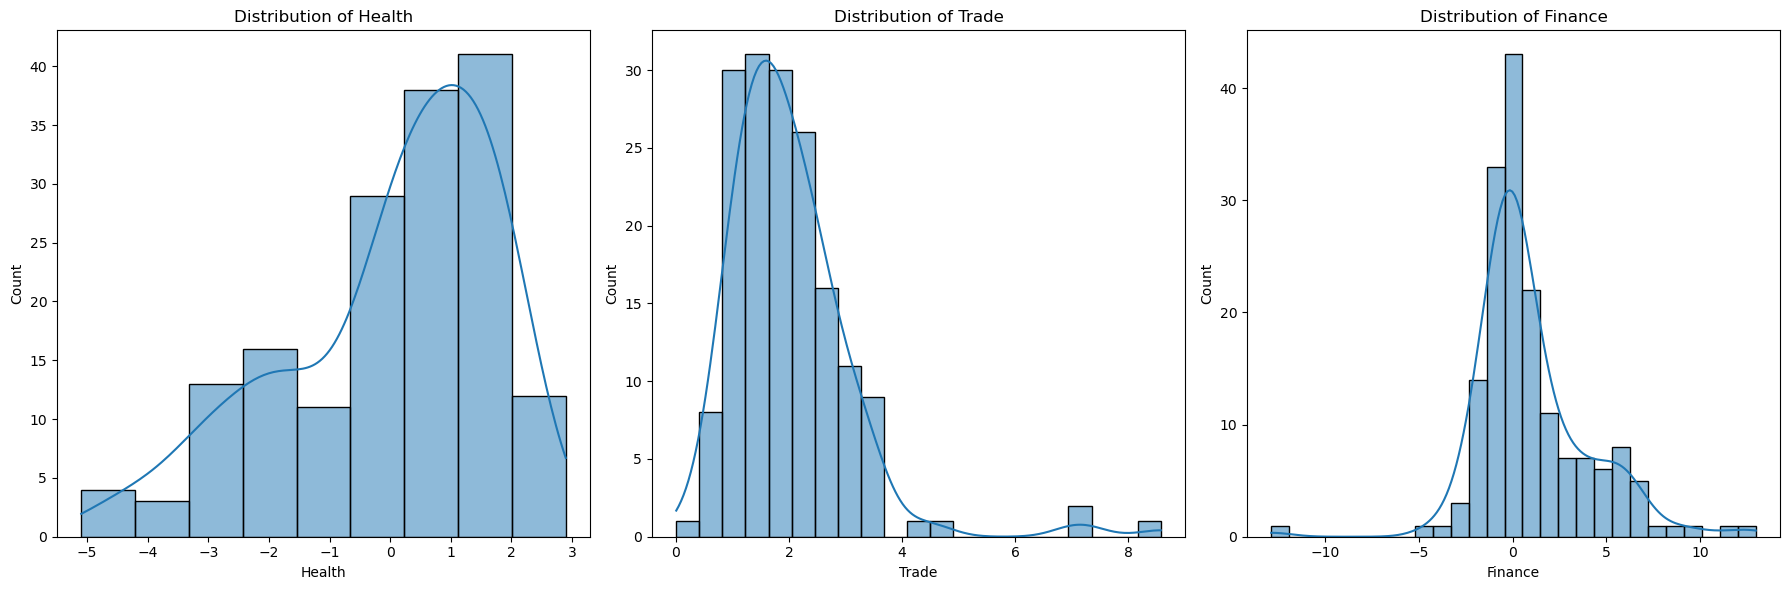

In [187]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axes= axes.flatten()
for index, column_name in enumerate(new_data):
    sns.histplot(new_data[column_name], kde=True, ax=axes[index])
    axes[index].set_title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

In [189]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler() 

new_data['Health'] = scaler.fit_transform(new_data[['Health']])
new_data['Trade'] = scaler.fit_transform(new_data[['Trade']])
new_data['Finance'] = scaler.fit_transform(new_data[['Finance']])

In [195]:
new_data

,Health,Trade,Finance
0,-1.384975,-0.726043,-0.684496
1,0.599706,-0.256572,-0.224915
2,0.001363,-0.359982,-0.650200
3,-2.246312,0.390996,-1.075300
4,0.561166,0.329722,0.286803
...,...,...,...
162,-0.164119,0.233909,-0.308383
163,0.288352,-0.846133,-1.613446
164,0.439832,1.328029,-0.722552
165,-0.765274,-0.487492,-1.209881


# MODELLING (KMeans)

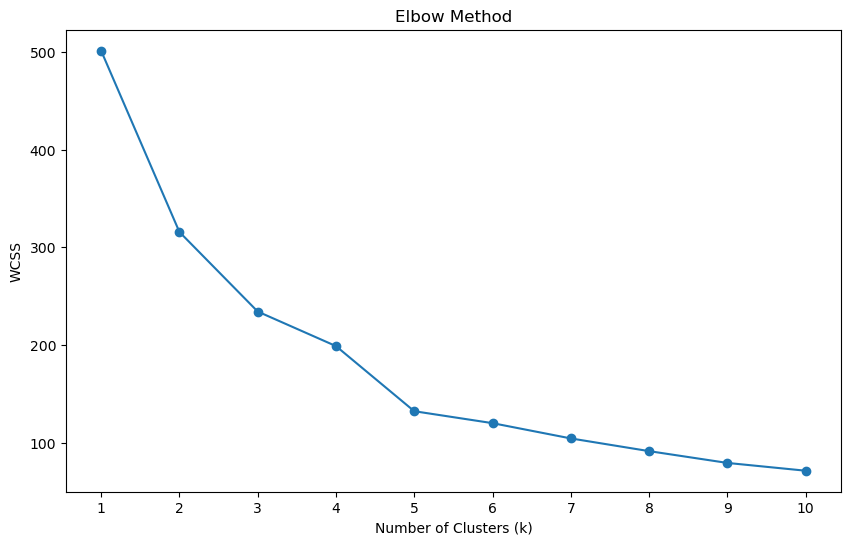

In [213]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [219]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(new_data)

data['cluster']= kmeans.labels_

In [221]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [225]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [227]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [229]:
data['Class'] = kmeans.labels_

In [231]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0


## MODEL INTERPRETATION

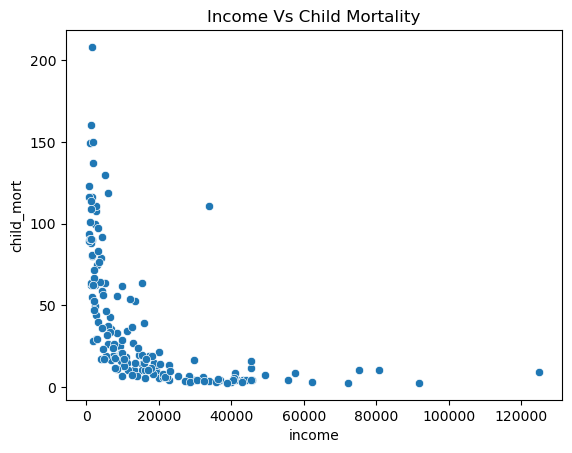

In [234]:
# Income Vs Child Mortality
# sns.regplot(x='child_mort', y='income', data=data)
sns.scatterplot(x='income', y='child_mort', data=data)
plt.title("Income Vs Child Mortality")
plt.show()

### Since we know low income and high child mortality are related
#### We plot `Income` and `Child mortality` w.r.t `class` predictions

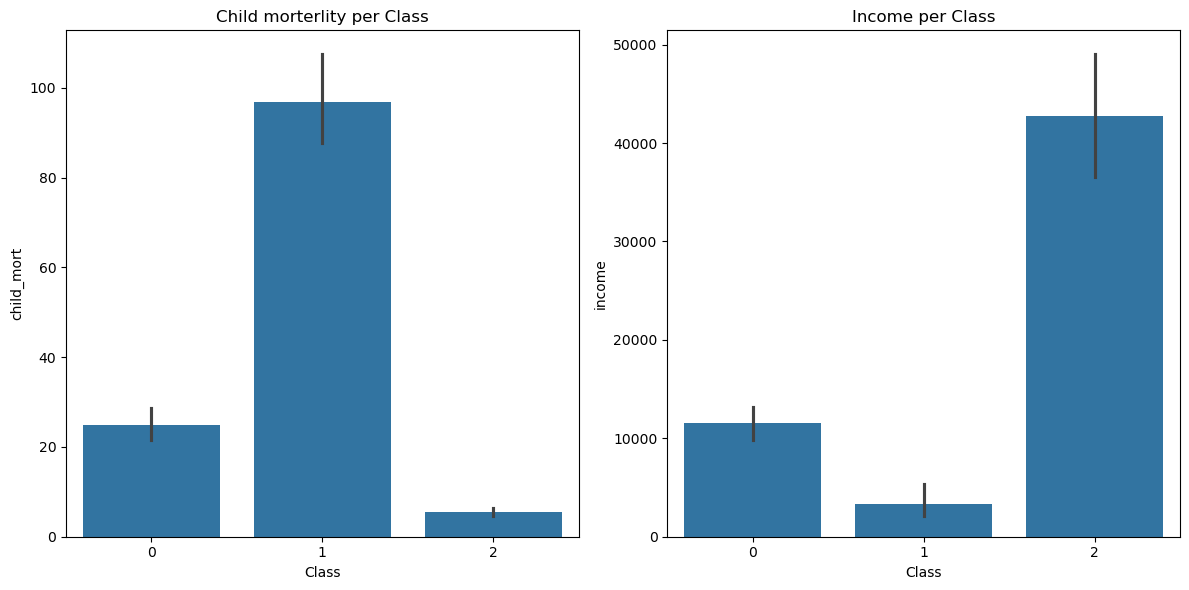

In [237]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='Class', y='child_mort', data=data) 
plt.title('Child morterlity per Class')

plt.subplot(1,2,2)
sns.barplot(x='Class', y='income', data=data)
plt.title('Income per Class')

plt.tight_layout()
plt.show()

### It is clear to conlude that:

0 : Not a priority <br>
1 : Requires foreign aid <br>
2 : Do NOT requires foreign aid <br>

In [240]:
# RENAMING THE CLASSES

data['Class'] = data['Class'].replace({0: "Not a priority", 
                                     1: "Requires foreign aid",
                                     2: "Do NOT requires foreign aid"
                                    })

In [242]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Requires foreign aid
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Not a priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Not a priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Requires foreign aid
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Not a priority


### Lets plot an interactive GeoMAP showing these categories

In [253]:
data[['country', 'Class']]

,country,Class
0,Afghanistan,Requires foreign aid
1,Albania,Not a priority
2,Algeria,Not a priority
3,Angola,Requires foreign aid
4,Antigua and Barbuda,Not a priority
...,...,...
162,Vanuatu,Not a priority
163,Venezuela,Not a priority
164,Vietnam,Not a priority
165,Yemen,Requires foreign aid


In [245]:
import plotly.express as px

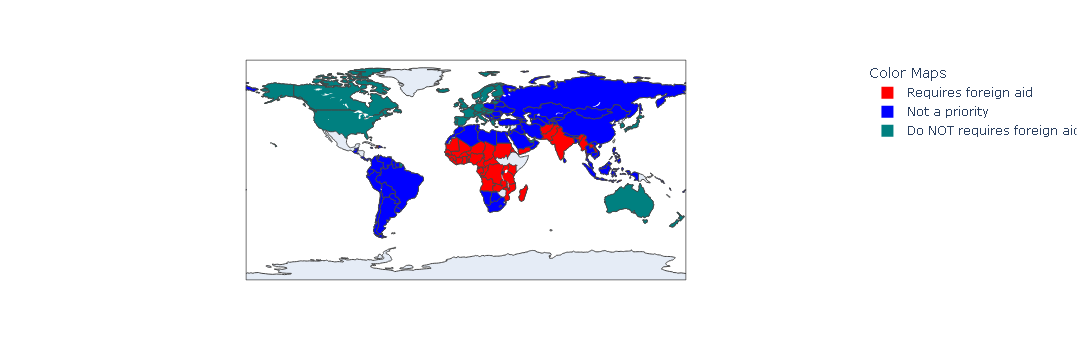

In [251]:
fig = px.choropleth(data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = data['Class'],  
                    color_discrete_map = {'Requires foreign aid':'Red',
                                        'Do NOT requires foreign aid':'teal',
                                        'Not a priority':'blue'}
                   )
fig.update_layout(legend_title_text = 'Color Maps')
fig.show()